<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/1)DepuracionBaseDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titulos**


1. Análisis de supervivencia del cáncer de mama utilizando modelos de aprendizaje automático con datos clínicos y perfiles de expresión génica

2 Analisis de Supervivencia del Cancer de mama utilizando Modelos de clasificacion
3. Prediccion de supervivencia del cancer de mama utilizando modelos de aprendizaje automático
4. Predicción de Supervivencia del Cancer de mama utilizando Modelos de clasificacion

# 1) **Contexto del Problema**

La mayoría de nosotros conoce a alguien que luchó contra el cáncer de mama, o al menos escuchó sobre las luchas que enfrentan los pacientes que luchan contra el cáncer de mama. El cáncer de mama es el cáncer más frecuente entre las mujeres y afecta a 2,1 millones de mujeres cada año. El cáncer de mama causa el mayor número de muertes relacionadas con el cáncer entre las mujeres. Solo en 2018, se estima que 627.000 mujeres murieron de cáncer de mama.

La parte más importante de un proceso de toma de decisiones clínicas en pacientes con cáncer, en general, es la estimación precisa del pronóstico y la duración de la supervivencia. Las pacientes con cáncer de mama con la misma etapa de la enfermedad y las mismas características clínicas pueden tener diferentes respuestas al tratamiento y supervivencia general, pero ¿por qué?

Los cánceres están asociados con anomalías genéticas. La expresión genética mide el nivel de actividad genética en un tejido y proporciona información sobre sus actividades complejas. La comparación de los genes expresados ​​en tejido normal y enfermo puede aportar una mejor comprensión del pronóstico y los resultados del cáncer. El uso de técnicas de aprendizaje automático en datos genéticos tiene el potencial de proporcionar la estimación correcta del tiempo de supervivencia y puede evitar procedimientos quirúrgicos y de tratamiento innecesarios.

Objetivo:

*Predecir la supervivencia del cáncer de mama utilizando modelos de aprendizaje automático con datos clínicos y perfiles de expresión génica.
Agrupación de genes*

https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

# **2) Descripción de los Datos**

La base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama (METABRIC) es un proyecto de Canadá-Reino Unido que contiene datos de  de 1.980 muestras de cáncer de mama primario. Los datos clínicos y genómicos se descargaron de cBioPortal.

El conjunto de datos fue recopilado por el profesor Carlos Caldas del Cambridge Research Institute y el profesor Sam Aparicio del British Columbia Cancer Center en Canadá y publicado en Nature Communications (Pereira et al., 2016). También apareció en varios artículos, incluidos Nature y otros:

* Associations between genomic stratification of breast cancer and centrally reviewed tumor pathology in the METABRIC cohort
https://www.nature.com/articles/s41523-018-0056-8

* Predicting Outcomes of Hormone and Chemotherapy in the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) Study by Biochemically-inspired Machine Learning https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/

Atributos clínicos en el conjunto de datos:

## **A) Importar Base de Datos**

In [1]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/METABRIC_RNA_Mutation.csv'
df=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(df.shape)

(1904, 693)


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,...,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,shank2_mut,ep300_mut,ptprd_mut,usp9x_mut,setd2_mut,setd1a_mut,thsd7a_mut,afdn_mut,erbb3_mut,rb1_mut,myo1a_mut,alk_mut,fanca_mut,adgra2_mut,ubr5_mut,pik3r1_mut,myo3a_mut,asxl2_mut,apc_mut,ctcf_mut,asxl1_mut,fancd2_mut,taf1_mut,kdm6a_mut,ctnna3_mut,brca1_mut,ptprm_mut,foxo3_mut,usp28_mut,gldc_mut,brca2_mut,cacna2d3_mut,arid2_mut,aff2_mut,lifr_mut,sbno1_mut,kdm3a_mut,ncoa3_mut,bap1_mut,l1cam_mut,pbrm1_mut,chd1_mut,jak1_mut,setdb1_mut,fam20c_mut,arid5b_mut,egfr_mut,map3k10_mut,smarcc2_mut,erbb4_mut,npnt_mut,nek1_mut,agmo_mut,zfp36l1_mut,smad4_mut,sik1_mut,casp8_mut,prkcq_mut,smarcc1_mut,palld_mut,dcaf4l2_mut,bcas3_mut,cdkn1b_mut,gps2_mut,men1_mut,stk11_mut,sik2_mut,ptpn22_mut,brip1_mut,flt3_mut,nrg3_mut,fbxw7_mut,ttyh1_mut,taf4b_mut,or6a2_mut,map3k13_mut,hdac9_mut,prkacg_mut,rpgr_mut,large1_mut,foxp1_mut,clk3_mut,prkcz_mut,lipi_mut,ppp2r2a_mut,prkce_mut,gh1_mut,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mta

In [6]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

## **B) Diccionario de Variables**

* patient_id: ID del paciente
* ageatdiagnosis:Edad de la paciente al momento del diagnóstico. 
* typeofbreast_surgery:Tipo de cirugía de cáncer de mama: 1- MASTECTOMÍA, que se refiere a una cirugía para extirpar todo el tejido mamario de una mama como una forma de tratar o prevenir el cáncer de mama. 2- CONSERVADORA DE MAMA, que se refiere a una urgencia donde solo la parte de la mama que tiene cancer se remueve
* cancer_type: Tipos de cáncer de mama: 1- Cáncer de mama o 2- Sarcoma de mama
* cancertypedetailed: Tipos detallados de cáncer de mama: 1- Carcinoma ductal invasivo de mama 2- Carcinoma ductal y lobulillar mixto de mama 3- Carcinoma lobular invasivo de mama 4- Carcinoma mucinoso mixto invasivo de mama 5- Cáncer de mama metaplásico
* cellularity: Celularidad del cáncer después de la quimioterapia, que se refiere a la cantidad de células tumorales en la muestra y su disposición en grupos.
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no)
* pam50+claudin-low_subtype: Pam 50: es una prueba de perfil tumoral que ayuda a mostrar si es probable que algunos cánceres de mama con receptores de estrógeno positivos (ER positivos) y HER2 negativos hagan metástasis (cuando el cáncer de mama se disemina a otros órganos). El subtipo de cáncer de mama con claudina baja se define por las características de expresión génica, principalmente: baja expresión de genes de adhesión célula-célula, alta expresión de genes de transición epitelial-mesenquimatosa (EMT) y patrones de expresión génica similares a células madre / menos diferenciados
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5)
* erstatusmeasuredbyihc: Para evaluar si los receptores de estrógeno se expresan en las células cancerosas mediante el uso de inmunohistoquímica (un tinte utilizado en patología que se dirige a un antígeno específico, si está allí, dará un color, no está allí, el tejido del portaobjetos se coloreará ) (positivo negativo)
* er_status: Las células cancerosas son positivas o negativas para los receptores de estrógeno
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3)
* her2statusmeasuredbysnp6: Evaluar si el cáncer es positivo para HER2 o no mediante el uso de técnicas moleculares avanzadas (tipo de secuenciación de próxima generación)
* her2_status: Si el cáncer es positivo o negativo para HER2
* tumorotherhistologic_subtype: Tipo de cáncer basado en el examen microscópico del tejido canceroso (toma un valor de 'Ductal / NST', 'Mixto', 'Lobular', 'Tubular / cribiforme', 'Mucinoso', 'Medular', 'Otro', 'Metaplástico')
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no)
* inferredmenopausalstate: Si la paciente es posmenopáusica o no (post / pre)
* integrative_cluster: Subtipo molecular del cáncer basado en alguna expresión genética (toma un valor de '4ER +', '3', '9', '7', '4ER-', '5', '8', '10', ' 1 ',' 2 ',' 6 ')
* primarytumorlaterality: Ya sea que involucre el seno derecho o el izquierdo
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer.
* mutation_count: Número de gen que tiene mutaciones relevantes
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* oncotree_code: OncoTree es una ontología de código abierto que se desarrolló en el Memorial Sloan Kettering Cancer Center (MSK) para estandarizar el diagnóstico de tipos de cáncer desde una perspectiva clínica al asignar a cada diagnóstico un código OncoTree único.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* **overall_survival: Variable objetivo si el paciente está vivo o muerto**.
* pr_status: Las células cancerosas son positivas o negativas para los receptores de progesterona
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* 3-geneclassifiersubtype: Subtipo de clasificador de tres genes Toma un valor de 'ER- / HER2-', 'ER + / HER2- High Prolif', nan, 'ER + / HER2- Low Prolif', 'HER2 +'
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia
* deathfromcancer:Si la muerte del paciente se debió a cáncer o no (sí / no)

Atributos genéticos en el conjunto de datos:
La parte genética del conjunto de datos contiene la puntuación z de los niveles de ARNm para 331 genes y la mutación para 175 genes.

Desde CBioPortal:

¿Qué son los ARNm?
Las moléculas de ADN unidas a cada portaobjetos actúan como sondas para detectar la expresión génica, que también se conoce como transcriptoma o el conjunto de transcripciones de ARN mensajero (ARNm) expresadas por un grupo de genes. Para realizar un análisis de microarrays, las moléculas de ARNm se recolectan típicamente tanto de una muestra experimental como de una muestra de referencia.

¿Qué son las puntuaciones Z de ARNm?
Para los datos de expresión de ARNm, se realizan los cálculos de la expresión relativa de un gen individual y un tumor a la distribución de expresión del gen en una población de referencia. Esa población de referencia son todas las muestras del estudio. El valor devuelto indica el número de desviaciones estándar de la media de expresión en la población de referencia (puntuación Z). Esta medida es útil para determinar si un gen está regulado hacia arriba o hacia abajo en relación con las muestras normales o con todas las demás muestras tumorales.

The formula is :

z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample

In [7]:
df["death_from_cancer"].value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [8]:
## Eliminamos las pacientes que mueren a cuasa de otras enfermedades
df=df[df["death_from_cancer"]!="Died of Other Causes"]

In [9]:
df["death_from_cancer"].value_counts()

Living             801
Died of Disease    622
Name: death_from_cancer, dtype: int64

In [10]:
df["overall_survival"].value_counts()

1    801
0    623
Name: overall_survival, dtype: int64

**Se elimina la Variable patient_id**

In [11]:
## Eliminar ID
df=df.drop(["patient_id"],axis=1)

## **C) Revision Datos Nulos**

In [12]:
Variables=df.columns.to_list()
print(f'Total Variables : {len(Variables)}')

Total Variables : 692


In [13]:
#Calculo del porcentaje de nulos
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df[i].isnull().sum())
  TipoVariable.append(df[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos
28,tumor_stage,343,float64,24.087079
26,3-gene_classifier_subtype,149,object,10.463483
17,primary_tumor_laterality,80,object,5.617978
4,cellularity,42,object,2.949438
19,mutation_count,39,float64,2.738764
10,neoplasm_histologic_grade,38,float64,2.668539
8,er_status_measured_by_ihc,20,object,1.404494
1,type_of_breast_surgery,16,object,1.123596
27,tumor_size,12,float64,0.842697
3,cancer_type_detailed,10,object,0.702247


### **Técnicas para el tratamiento de valores faltantes**

Existen multitud de procedimientos para aplicar cuando tenemos valores perdidos. Aunque básicamente existen dos aproximaciones posibles:

* Eliminar muestras o variables que tienen datos faltantes.
* Imputar los valores perdidos, es decir, sustituirlos por estimaciones.

#### **Imputación**

Las técnicas de imputación son procedimientos que estiman el valor del dato faltante. Por lo tanto, al tratarse de una estimación no se debe abusar de ellas.

##### **Sustitución para variables tipo Numérica**

El método de sustitución por la media, como es de esperar, solo se puede aplicar sobre variables que sean de tipo numérico. Existen otras alternativas como sustituir por la mediana.

###### **Imputamos mutation_count y tumor_size**

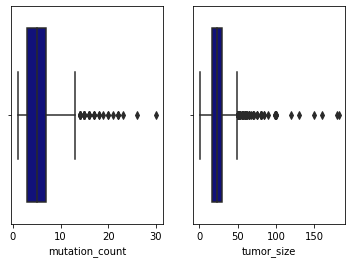

In [14]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=df.mutation_count,color="darkblue", ax=axs[0])
sns.boxplot(x=df.tumor_size,color="darkblue", ax=axs[1])
plt.show()

Vemos que las dos variables presentan datos atipicos, por lo tanto se decide Imputar los valores nulos por medio de la Mediana, ya que es menos sensible a datos atipicos

In [15]:
df.mutation_count=df.mutation_count.replace(np.nan,df.mutation_count.median())
df.tumor_size=df.tumor_size.replace(np.nan,df.tumor_size.median())

##### **Sustitución para variables tipo Categórica**

El método de sustitución por la moda es usada para variables tipo factor, es el valor que más se repite

###### **Imputacion para la Variable Categoricas**

* tumor_stage
* 3-gene_classifier_subtype
* primary_tumor_laterality
* cellularity
* er_status_measured_by_ihc
* neoplasm_histologic_grade
* cancer_type_detailed
* tumor_other_histologic_subtype

In [16]:
print(df.tumor_stage.value_counts())
moda=stats.mode(df.tumor_stage)
print(f'La moda es : {moda[0][0]}')
df.tumor_stage=df.tumor_stage.replace(np.nan,moda[0][0])

2.0    604
1.0    369
3.0     96
4.0      9
0.0      3
Name: tumor_stage, dtype: int64
La moda es : 2.0


In [17]:
print(df["3-gene_classifier_subtype"].value_counts())
moda=stats.mode(df["3-gene_classifier_subtype"])
df["3-gene_classifier_subtype"]=df["3-gene_classifier_subtype"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

ER+/HER2- High Prolif    433
ER+/HER2- Low Prolif     433
ER-/HER2-                242
HER2+                    167
Name: 3-gene_classifier_subtype, dtype: int64
La moda es : ER+/HER2- Low Prolif


In [18]:
print(df["primary_tumor_laterality"].value_counts())
moda=stats.mode(df["primary_tumor_laterality"])
df["primary_tumor_laterality"]=df["primary_tumor_laterality"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Left     693
Right    651
Name: primary_tumor_laterality, dtype: int64
La moda es : Left


In [19]:
print(df["primary_tumor_laterality"].value_counts())
moda=stats.mode(df["primary_tumor_laterality"])
df["primary_tumor_laterality"]=df["primary_tumor_laterality"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Left     773
Right    651
Name: primary_tumor_laterality, dtype: int64
La moda es : Left


In [20]:
print(df["cellularity"].value_counts())
moda=stats.mode(df["cellularity"])
df["cellularity"]=df["cellularity"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

High        706
Moderate    525
Low         151
Name: cellularity, dtype: int64
La moda es : High


In [21]:
print(df["neoplasm_histologic_grade"].value_counts())
moda=stats.mode(df["neoplasm_histologic_grade"])
df["neoplasm_histologic_grade"]=df["neoplasm_histologic_grade"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

3.0    735
2.0    536
1.0    115
Name: neoplasm_histologic_grade, dtype: int64
La moda es : 3.0


In [22]:
print(df["er_status_measured_by_ihc"].value_counts())
moda=stats.mode(df["er_status_measured_by_ihc"])
df["er_status_measured_by_ihc"]=df["er_status_measured_by_ihc"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Positve     1035
Negative     369
Name: er_status_measured_by_ihc, dtype: int64
La moda es : Positve


In [23]:
print(df["type_of_breast_surgery"].value_counts())
moda=stats.mode(df["type_of_breast_surgery"])
df["type_of_breast_surgery"]=df["type_of_breast_surgery"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

MASTECTOMY           806
BREAST CONSERVING    602
Name: type_of_breast_surgery, dtype: int64
La moda es : MASTECTOMY


In [24]:
print(df["cancer_type_detailed"].value_counts())
moda=stats.mode(df["cancer_type_detailed"])
df["cancer_type_detailed"]=df["cancer_type_detailed"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Breast Invasive Ductal Carcinoma             1137
Breast Mixed Ductal and Lobular Carcinoma     141
Breast Invasive Lobular Carcinoma             104
Breast Invasive Mixed Mucinous Carcinoma       17
Breast                                         15
Name: cancer_type_detailed, dtype: int64
La moda es : Breast Invasive Ductal Carcinoma


In [25]:
print(df["tumor_other_histologic_subtype"].value_counts())
moda=stats.mode(df["tumor_other_histologic_subtype"])
df["tumor_other_histologic_subtype"]=df["tumor_other_histologic_subtype"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Ductal/NST             1101
Mixed                   141
Lobular                 104
Medullary                20
Mucinous                 17
Tubular/ cribriform      16
Other                    15
Name: tumor_other_histologic_subtype, dtype: int64
La moda es : Ductal/NST


In [26]:
print(df["oncotree_code"].value_counts())
moda=stats.mode(df["oncotree_code"])
df["oncotree_code"]=df["oncotree_code"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

IDC       1137
MDLC       141
ILC        104
IMMC        17
BREAST      15
Name: oncotree_code, dtype: int64
La moda es : IDC


**Revisamos Nuevamente los valores Nulos**

In [27]:
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df[i].isnull().sum())
  TipoVariable.append(df[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos
29,death_from_cancer,1,object,0.070225


#### **Eliminación de muestras** 

* Para este caso eliminamos los valores nulos de la variable death_from_cancer, que correponden al 0.07%	

In [28]:
print(df["death_from_cancer"].value_counts())

Living             801
Died of Disease    622
Name: death_from_cancer, dtype: int64


In [29]:
print(f'Variables con Nulos: {len(NAS)}' )

Variables con Nulos: 1


In [30]:
df_Sin_Nulos=df.dropna()

**Proporcion que queda despues de la depuracion de los valores Nulos**

In [31]:
(1-len(df_Sin_Nulos)/len(df))*100

0.0702247191011196

**Revisamos Nuevamente los Valores Nulos**

In [32]:
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df_Sin_Nulos[i].isnull().sum())
  TipoVariable.append(df_Sin_Nulos[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df_Sin_Nulos))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos


**No tenemos Valores Nulos**

In [33]:
VariablesNumericas=df_Sin_Nulos._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df_Sin_Nulos.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df_Sin_Nulos.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 502: ['age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag

**Variables numéricas**

In [34]:
valores_unicos=[]
Variable=[]
MAX=[]
MIN=[]
for i in VariablesNumericas:
  Variable.append(i)
  valores_unicos.append(len(df_Sin_Nulos[i].unique()))
  MAX.append((df_Sin_Nulos[i]).max())
  MIN.append((df_Sin_Nulos[i]).min())
  
VN=pd.DataFrame({"Variable":Variable,"ValoresUnicos":valores_unicos,"MAX":MAX,"MIN":MIN})
VN

,Variable,ValoresUnicos,MAX,MIN
0,age_at_diagnosis,1215,96.2900,21.9300
1,chemotherapy,2,1.0000,0.0000
2,cohort,5,5.0000,1.0000
3,neoplasm_histologic_grade,3,3.0000,1.0000
4,hormone_therapy,2,1.0000,0.0000
...,...,...,...,...
497,tnk2,1298,3.2616,-3.8333
498,tulp4,1326,3.8334,-3.6093
499,ugt2b15,1364,10.8849,-1.1669
500,ugt2b17,1356,12.6439,-2.1126


###  **Recodificamos las variables que python interpreta como numéricas pero deberian ser categoricas**}

**Vemos que hay Variables que tienen muy pocos Valores Unicos, se sospecha que pueden ser variables numericas, vamos a revisar el Diccionario.**

* age_at_diagnosis
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no), deberia ser categórica.
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5), deberia ser Tipo Categórica.
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3), deberia ser categórica.
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no), Tipo categórica.
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer, Tipo categórica.
* mutation_count: Número de gen que tiene mutaciones relevantes, Tipo Numerica.
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* overall_survival: Variable objetivo si el paciente está vivo o muerto.
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* tumor_stage: Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia

In [35]:
VariablesNumericas

['age_at_diagnosis',
 'chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'overall_survival_months',
 'overall_survival',
 'radio_therapy',
 'tumor_size',
 'tumor_stage',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',
 'cdk6',
 'ccnd2',
 'cdkn2a',
 'cdkn2b',
 'myc',
 'cdkn1a',
 'cdkn1b',
 'e2f1',
 'e2f2',
 'e2f3',
 'e2f4',
 'e2f5',
 'e2f6',
 'e2f7',
 'e2f8',
 'src',
 'jak1',
 'jak2',
 'stat1',
 'stat2',
 'stat3',
 'stat5a',
 'stat5b',
 'mdm2',
 'tp53bp1',
 'adam10',
 'adam17',
 'aph1a',
 'aph1b',
 'arrdc1',
 'cir1',
 'ctbp1',
 'ctbp2',
 'cul1',
 'dll1',
 'dll3',
 'dll4',
 'dtx1',
 'dtx2',
 'dtx3',
 'dtx4',
 'ep300',
 'fbxw7',
 'hdac1',

In [36]:
## convertimos en Categoricas, las que deben ser categoricas y no numericas
# convertimos variables que estan en formato float a int antes de convertirlas a Categóricas
df_Sin_Nulos[["cohort",'neoplasm_histologic_grade','tumor_stage']]=df_Sin_Nulos[["cohort",'neoplasm_histologic_grade','tumor_stage']].astype(int)
df_Sin_Nulos[['chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'overall_survival',
 'radio_therapy',
 'tumor_stage']]=df_Sin_Nulos[['chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'overall_survival',
 'radio_therapy',
 'tumor_stage']].astype("category")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [37]:
df_Sin_Nulos = df_Sin_Nulos.reset_index(drop=True)

In [38]:
## Identificamos los tipos de variables nuevamente
VariablesNumericas=df_Sin_Nulos._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df_Sin_Nulos.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df_Sin_Nulos.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 495: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag2', 'kdm5a', 'lfng', 'maml1', 'maml2', 'maml3', 'ncor2', 'ncstn', 'notch1', 'notch2', 'notch3', 'nrarp', 'numb', 'numbl', 'pse

In [39]:
valores_unicos=[]
Variable=[]
MAX=[]
MIN=[]
for i in VariablesNumericas:
  Variable.append(i)
  valores_unicos.append(len(df_Sin_Nulos[i].unique()))
  MAX.append((df_Sin_Nulos[i]).max())
  MIN.append((df_Sin_Nulos[i]).min())
  
VN=pd.DataFrame({"Variable":Variable,"ValoresUnicos":valores_unicos,"MAX":MAX,"MIN":MIN})
VN

,Variable,ValoresUnicos,MAX,MIN
0,age_at_diagnosis,1215,96.290000,21.9300
1,lymph_nodes_examined_positive,30,45.000000,0.0000
2,mutation_count,25,30.000000,1.0000
3,nottingham_prognostic_index,274,6.360000,1.0000
4,overall_survival_months,1283,337.033333,0.0000
5,tumor_size,99,182.000000,1.0000
6,brca1,1379,4.358500,-2.4444
7,brca2,1389,3.737900,-2.7835
8,palb2,1388,4.615000,-3.7420
9,pten,1392,3.254100,-5.9328


**Hemos recodificado las variables numericas de forma correcta**

### **Variables texto a tipo categórica**

In [40]:
df_Sin_Nulos[VariablesTexto]=df_Sin_Nulos[VariablesTexto].astype("category")

**Se revisa la distribución de la variable Objetivo Overall survival y death from cancer**
Estas variables presentan la misma informacion, por lo tanto se decide borrar de la Base de datos

In [41]:
pd.crosstab(df_Sin_Nulos.death_from_cancer, df_Sin_Nulos.overall_survival, margins = True)

overall_survival,0,1,All
death_from_cancer,,,
Died of Disease,622,0,622
Living,0,801,801
All,622,801,1423


In [42]:
df_Sin_Nulos=df_Sin_Nulos.drop(["death_from_cancer"],axis=1)

**Finalmente tenemos las siguientes Variables en el formato adecuado**

In [43]:
## Identificamos los tipos de variables nuevamente
VariablesNumericas=df_Sin_Nulos._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df_Sin_Nulos.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df_Sin_Nulos.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 495: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag2', 'kdm5a', 'lfng', 'maml1', 'maml2', 'maml3', 'ncor2', 'ncstn', 'notch1', 'notch2', 'notch3', 'nrarp', 'numb', 'numbl', 'pse

In [44]:
#df_Sin_Nulos.muc16_mut.value_counts()

## **3) Convertimos en Variables Dummies**

### **Solo Variables No Geneticas**

In [45]:
df_sin_Variables_Geneticas=df_Sin_Nulos.iloc[:,0:29]
df_sin_Variables_Geneticas.head(2)

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1,Positve,Positive,3,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,5.0,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,Positive,3,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1


In [46]:
cat_columnas=df_sin_Variables_Geneticas.drop(['overall_survival'],axis=1).select_dtypes(include=["category"]).columns.to_list()
cat_columnas

['type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'oncotree_code',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_stage']

In [47]:
num_columnas=df_sin_Variables_Geneticas._get_numeric_data().columns
print(num_columnas)

Index(['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size'],
      dtype='object')


In [48]:
def tabla_con_variables_seleccionadas(df,num_columnas, cat_columnas):
    datos_filtro=df
    if cat_columnas != []:
        datos_filtro_dummies=pd.get_dummies(datos_filtro[cat_columnas],drop_first=True)#  elimanar la primera para modelos parametricos
        X=pd.concat([datos_filtro[num_columnas],datos_filtro_dummies],axis=1, sort=False)
    else:#  solo use las variables numéricas
        X = datos_filtro[num_columnas].apply
    return X

In [49]:
X_No_Geneticas=tabla_con_variables_seleccionadas(df_sin_Variables_Geneticas,num_columnas, cat_columnas)

In [50]:
X_No_Geneticas.shape

(1423, 65)

In [51]:
Y=df_sin_Variables_Geneticas['overall_survival']

In [52]:
Base_No_Genetica=pd.concat([X_No_Geneticas,df_sin_Variables_Geneticas['overall_survival']],axis=1, sort=False)

In [53]:
Base_No_Genetica.head(2)

,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,type_of_breast_surgery_MASTECTOMY,cancer_type_Breast Sarcoma,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cellularity_Low,cellularity_Moderate,chemotherapy_1,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,pam50_+_claudin-low_subtype_NC,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,cohort_2,cohort_3,cohort_4,cohort_5,er_status_measured_by_ihc_Positve,er_status_Positive,neoplasm_histologic_grade_2,neoplasm_histologic_grade_3,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,her2_status_measured_by_snp6_UNDEF,her2_status_Positive,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,hormone_therapy_1,inferred_menopausal_state_Pre,integrative_cluster_10,integrative_cluster_2,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,primary_tumor_laterality_Right,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MDLC,pr_status_Positive,radio_therapy_1,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,tumor_stage_1,tumor_stage_2,tumor_stage_3,tumor_stage_4,overall_survival
0,75.65,10.0,5.0,6.044,140.500000,22.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1
1,43.19,0.0,2.0,4.020,84.633333,10.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1


In [54]:
Base_No_Genetica.to_csv("/content/drive/MyDrive/Monografìa/codigo/Base_Sin_Variable_Geneticas.csv",index=False)

## **4) Analisis de Reducción de Dimensionalidad Para la Base Incluyendo Variables Geneticas**